# 클러스터링 연습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('/content/Raw_data.csv')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'].replace(' ',''))
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


군집분석 단계
1. 알맞은 속성 선택
2. 데이터 표준화
3. 이상치 선별
4. 거리의 계산
5. 군집 알고리즘 선택
6. 하나 이상의 군집분석 결과 얻음
7. 군집의 갯수 결정
8. 최종결과 획득
9. 분석 결과의 시각화
10. 군집분석 결과의 해석
11. 결과의 확인

## 결측값 제거

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
data = data.dropna() # 결측값 제거
data =data.reset_index() # 인덱스 초기화
data = data.drop(columns='index') # 인덱스 컬럼제거
left_data = data.copy()
customerID = data['customerID'] # 고객id저장
data = data.iloc[:,1:] # 고객id 테이블에서 제거
data = pd.get_dummies(data,drop_first=True) 

data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7029,0,11,29.60,346.45,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


## 알맞은 속성 선택(데이터를 군집화하는데 중요하다고 생각하는 특성들을 선택하는 단계)

In [4]:
data =data[['tenure','MonthlyCharges', 'TotalCharges']]
data

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7027,24,84.80,1990.50
7028,72,103.20,7362.90
7029,11,29.60,346.45
7030,4,74.40,306.60


## 스케일링

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


## 이상치제거

표준화를 시켜서 그런지 이상치가 보이지않는다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


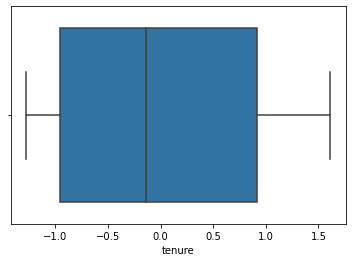

In [6]:
sns.boxplot(data['tenure'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


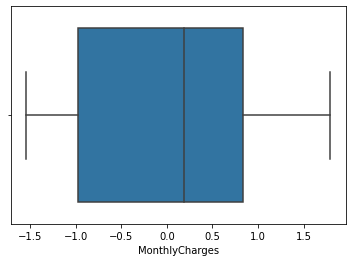

In [7]:
sns.boxplot(data['MonthlyCharges'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


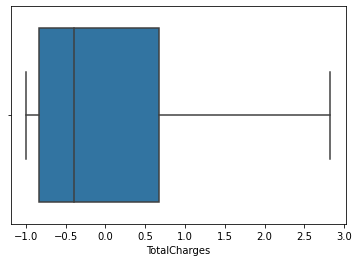

In [8]:
sns.boxplot(data['TotalCharges'])

## 군집알고리즘 선택

계층적 군집이 아닌 비계층적 군집을 사용할 것이다. 왜냐하면 고객의 군집을 최우수,우수,일반 혹은 우수, 일반 이렇게 대략적으로 구상을 하고있으며, 최적의 k값을 구한뒤 적용을 할것이기 때문에 미리 k값이 나오게된다. 그리고 덴드로 그램을통해 어떻게 형성되었는지를 확인하고 싶은것이 아니기때문에 k-means를 사용하여 최적의 k값을 먼저 확인후 2개와 3개중 더 적당한것으로 결정할 것이다.

## 최적의 클러스터링 개수 구하기

In [9]:
# 클러스터링
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(data)
    sum_of_squared_distances.append(km.inertia_)
   

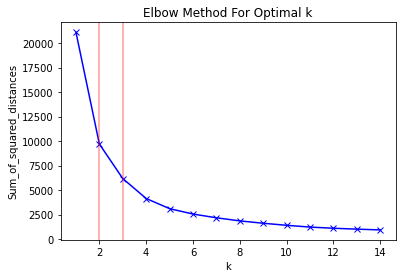

In [10]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

In [11]:
data

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [12]:
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(data)
  clusters = kmeans.predict(data)

  score = silhouette_score(data, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.4795243516623505
k : 3 score : 0.45162348516961115
k : 4 score : 0.4720646569227696
k : 5 score : 0.44345410777667377
k : 6 score : 0.43857106174593297
k : 7 score : 0.4326261790305853
k : 8 score : 0.42735399053894063
k : 9 score : 0.4304872121034563
k : 10 score : 0.4356814188700147
k : 11 score : 0.4292963170580597
k : 12 score : 0.43024127046747296
k : 13 score : 0.42545018406902924
best n : 2 best score : 0.4795243516623505


## 최적의 군집수 적용

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =2, init = 'k-means++', max_iter =300, random_state = 42)
kmeans.fit(data)
data['군집소속'] = kmeans.labels_
data['군집소속']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0       0
1       0
2       0
3       0
4       0
       ..
7027    0
7028    1
7029    0
7030    0
7031    1
Name: 군집소속, Length: 7032, dtype: int32

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(data)
pca_transformed

array([[-1.96832213,  0.08754966],
       [-0.28914186,  0.23273373],
       [-1.55255489, -0.51954716],
       ...,
       [-1.66035045,  0.34862111],
       [-1.13392931, -1.00781082],
       [ 2.85050565, -0.12759651]])

In [15]:
data['pca_x'] = pca_transformed[:,0]
data['pca_y'] = pca_transformed[:,1]
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tenure,MonthlyCharges,TotalCharges,군집소속,pca_x,pca_y
0,-1.280248,-1.161694,-0.994194,0,-1.968322,0.087550
1,0.064303,-0.260878,-0.173740,0,-0.289142,0.232734
2,-1.239504,-0.363923,-0.959649,0,-1.552555,-0.519547
3,0.512486,-0.747850,-0.195248,0,-0.285241,0.889250
4,-1.239504,0.196178,-0.940457,0,-1.279500,-0.963368
...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0,-0.051772,-0.746365
7028,1.612573,1.276493,2.241056,1,3.092710,0.098261
7029,-0.872808,-1.170004,-0.854514,0,-1.660350,0.348621
7030,-1.158016,0.319168,-0.872095,0,-1.133929,-1.007811


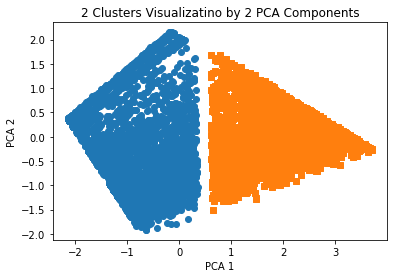

In [16]:
``# 군집값이 0,1인 경우 별도 인덱스 추출
marker0_ind = data[data['군집소속']==0].index
marker1_ind = data[data['군집소속']==1].index

# 군집 값 0,1에 해당하는 인데스로 각 군집 레벨의 pca_x, pca_y값 추출
plt.scatter(x = data.loc[marker0_ind,'pca_x'], y = data.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = data.loc[marker1_ind,'pca_x'], y = data.loc[marker1_ind, 'pca_y'], marker = 's')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 Clusters Visualizatino by 2 PCA Components')
plt.show()

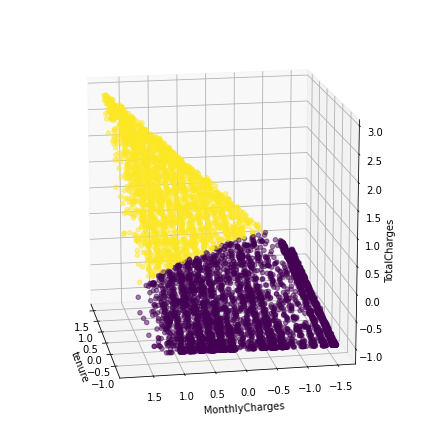

In [36]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=170)
ax.scatter(data['tenure'],data['MonthlyCharges'],data['TotalCharges'],c=data['군집소속'],alpha=0.5)
ax.set_xlabel('tenure')
ax.set_ylabel('MonthlyCharges')
ax.set_zlabel('TotalCharges')

plt.show()

In [ ]:
data.groupby('군집소속').mean().sort_values(by='tenure',ascending=False).style.background_gradient(cmap = 'Blues')

,tenure,MonthlyCharges,TotalCharges
군집소속,,,
1,0.995924,0.829614,1.236068
0,-0.503078,-0.419069,-0.624384


In [ ]:
data

,tenure,MonthlyCharges,TotalCharges,군집소속
0,-1.280248,-1.161694,-0.994194,0
1,0.064303,-0.260878,-0.173740,0
2,-1.239504,-0.363923,-0.959649,0
3,0.512486,-0.747850,-0.195248,0
4,-1.239504,0.196178,-0.940457,0
...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0
7028,1.612573,1.276493,2.241056,1
7029,-0.872808,-1.170004,-0.854514,0
7030,-1.158016,0.319168,-0.872095,0


In [ ]:
data['customerID'] = customerID
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tenure,MonthlyCharges,TotalCharges,군집소속,customerID
0,-1.280248,-1.161694,-0.994194,0,7590-VHVEG
1,0.064303,-0.260878,-0.173740,0,5575-GNVDE
2,-1.239504,-0.363923,-0.959649,0,3668-QPYBK
3,0.512486,-0.747850,-0.195248,0,7795-CFOCW
4,-1.239504,0.196178,-0.940457,0,9237-HQITU
...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0,6840-RESVB
7028,1.612573,1.276493,2.241056,1,2234-XADUH
7029,-0.872808,-1.170004,-0.854514,0,4801-JZAZL
7030,-1.158016,0.319168,-0.872095,0,8361-LTMKD


In [ ]:
cluster_list = []
for i in data['군집소속']:
  if i ==1:
    cluster_list.append('우수 고객')
  elif i == 0:
    cluster_list.append('일반 고객')
  

data['고객유형'] = cluster_list
data['고객유형'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


일반 고객    4672
우수 고객    2360
Name: 고객유형, dtype: int64

In [ ]:
data.drop(columns = '군집소속',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data

,tenure,MonthlyCharges,TotalCharges,군집소속,customerID,고객유형
0,-1.280248,-1.161694,-0.994194,0,7590-VHVEG,일반 고객
1,0.064303,-0.260878,-0.173740,0,5575-GNVDE,일반 고객
2,-1.239504,-0.363923,-0.959649,0,3668-QPYBK,일반 고객
3,0.512486,-0.747850,-0.195248,0,7795-CFOCW,일반 고객
4,-1.239504,0.196178,-0.940457,0,9237-HQITU,일반 고객
...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0,6840-RESVB,일반 고객
7028,1.612573,1.276493,2.241056,1,2234-XADUH,우수 고객
7029,-0.872808,-1.170004,-0.854514,0,4801-JZAZL,일반 고객
7030,-1.158016,0.319168,-0.872095,0,8361-LTMKD,일반 고객


In [ ]:
right_data = data[['customerID', '고객유형']]
right_data

,customerID,고객유형
0,7590-VHVEG,일반 고객
1,5575-GNVDE,일반 고객
2,3668-QPYBK,일반 고객
3,7795-CFOCW,일반 고객
4,9237-HQITU,일반 고객
...,...,...
7027,6840-RESVB,일반 고객
7028,2234-XADUH,우수 고객
7029,4801-JZAZL,일반 고객
7030,8361-LTMKD,일반 고객


In [ ]:
left_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df = pd.merge(left_data, right_data,how = 'inner', on ='customerID')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,고객유형
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,일반 고객
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,일반 고객
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,일반 고객
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,일반 고객
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,일반 고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,일반 고객
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,우수 고객
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,일반 고객
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,일반 고객


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df = df.drop(columns = ['Churn', 'customerID'])
df = pd.get_dummies(df,drop_first=True) 

In [ ]:
df.rename(columns={'고객유형_일반 고객' : '일반고객'},inplace=True)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,일반고객
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1
7028,0,72,103.20,7362.90,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7029,0,11,29.60,346.45,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
7030,1,4,74.40,306.60,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [ ]:
df.groupby('일반고객').mean().sort_values(by='tenure',ascending=False).style.background_gradient(cmap = 'Blues')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
일반고객,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.214831,56.865254,89.756186,5084.985551,0.504661,0.666525,0.329661,0.938559,0.061441,0.696610,0.658898,0.000000,0.000000,0.523729,0.000000,0.652119,0.000000,0.666949,0.000000,0.539831,0.000000,0.705508,0.000000,0.708898,0.300847,0.400847,0.693644,0.303390,0.313983,0.077119
1,0.135916,20.074486,52.191010,868.065668,0.504709,0.389555,0.282748,0.885488,0.114512,0.283176,0.329837,0.325342,0.325342,0.166738,0.325342,0.189640,0.325342,0.180651,0.325342,0.163955,0.325342,0.222175,0.325342,0.226455,0.163099,0.158176,0.541738,0.172303,0.347603,0.304366
